# Pre-requisites

## Install Python 3.12.

Recommended ways to install Python 3.12 are using a version manager like:

- **[uv](https://docs.astral.sh/uv/):** It is also a package manager like npm, and faster than pip or poetry. Recommended.
- **[mise](https://mise.jdx.dev/getting-started.html):** Supports other languages as well.

Once uv is installed, you can install Python 3.12 using the following command:

```bash
uv python install 3.12
```

## Start a UV project

Using uv you can use it to manage your project dependencies as well. First you create a new project:

```bash
uv init
```

This add a pyproject.toml file, similar to a package.json file in a Node.js project. Better than manually maintaining a requirements.txt file.

## Create a virtual environment

You can create a virtual environment using the following command:

```bash
uv venv # this prints out how to activate the virtual environment
source .venv/bin/activate[.fish] # activate the virtual environment
```

A virtual environment is a self-contained directory tree that contains a Python installation for a particular version of Python, plus all your dependencies.

## Jupyter Notebook

Now, finally, we can install our first dependency, Jupyter Notebook:

```bash
uv add jupyter
```

Jupyter is a great tool for experimentation and learning. [VS Code extension](https://code.visualstudio.com/docs/datascience/jupyter-notebooks) is also available for Jupyter.

A nice talk about why an interactive environment like Jupyter is important: [Literate Programming](https://www.youtube.com/watch?v=rX1yGxJijsI)


## Launch VS Code:

```bash
code .
```

VS Code will begin inside the virtual environment, with access to libraries installed in it.

## Let's start learning about ["How to teach new things to an AI"](https://docs.google.com/presentation/d/1so8_4HOEu9WsowwXYrVafhxLB4A3pM36uaWsg34PQCQ/edit#slide=id.g3029596e088_0_352)

## And jump into the data preparation -> text extraction part:

PyMuPDF is a fast text extraction library for python, it is open source with an AGPL 3.0 license. Other alternatives you should look at are:

- [docling](https://github.com/DS4SD/docling) from IBM.
- [GOT-OCR2.0](https://github.com/Ucas-HaoranWei/GOT-OCR2.0) from a Chinese university. Nice [description from Merve](https://x.com/mervenoyann/status/1843278355749065084).
- [MoondreamAI](https://github.com/vikhyat/moondream) plus PyMuPDF image extraction to add captions to images.

We need to add our second dependency, [PyMuPDF4LLM](https://pymupdf.readthedocs.io/en/latest/pymupdf4llm/):

```bash
uv add pymupdf4llm
```

---

By the way, parsing HTML has the same problem. How do you extract content ignoring navigation, footers, headers, ads? With [small language models](https://jina.ai/news/reader-lm-small-language-models-for-cleaning-and-converting-html-to-markdown/)?

In [1]:
import pymupdf4llm

md_text = pymupdf4llm.to_markdown(
    "./docs/RRS20212024Final-_26369_.pdf",
    write_images=True,
    image_path="./images",
)
print(md_text)

Processing ./docs/RRS20212024Final-_26369_.pdf...
[                                        ] (0/15[                                        ] (  1/15[                                        ] (  2/15[                                        ] (  3/158[=                                       ] (  4/158[=                                       ] (  5/158[=                                       ] (  6/158[=                                       ] (  7/15[==                                      ] (  8/15[==                                      ] (  9/15[==                                      ] ( 10/15[==                                      ] ( 11/158[===                                     ] ( 12/158[===                                     ] ( 13/1[===                                     ] ( 14/158[===                                     ] ( 15/15[====                                    ] ( 16/15[====                                    ] ( 17/15[====                                    ] ( 1

# Chunking

For 2 main reasons:
- When we have more than what fits in my LLM context length. Remember to use the [ruler](https://github.com/NVIDIA/RULER).
- When we want reliable citations and sources for our answers.

...we need to chunk the extracted text into smaller parts. We can use the following code to do that.

And to chunk, it is good to use a tokenizer library. Recommended further readings:
- [You Should Probably Pay Attention to Tokenizers](https://cybernetist.com/2024/10/21/you-should-probably-pay-attention-to-tokenizers/)
- [Chunking Strategies for LLM Applications](https://www.pinecone.io/learn/chunking-strategies/)
- [Chunking for RAG: best practices](https://unstructured.io/blog/chunking-for-rag-best-practices)

To do chunking, we need to properly size the chunks. We need to know:

- The embedding model we are using, and it's context length. [MTEB leaderboard](https://huggingface.co/spaces/mteb/leaderboard) is a good place to start.
- The tokenizer the model uses, usually from the model page, like [nomic's embed 1.5](https://huggingface.co/nomic-ai/nomic-embed-text-v1.5).

We also have a new dependencies:

```bash
uv add tokenizers
```

In [3]:
from tokenizers import Tokenizer

tokenizer = Tokenizer.from_pretrained("bert-base-uncased")

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

## Semantic text splitting

A combination of text splitting and tokenization can be used to split text into semantically meaningful units.

Two fast libraries for this are:

- [Semantic text splitter](https://github.com/benbrandt/text-splitter)
- [SemChunk](https://github.com/umarbutler/semchunk)
- In the future... [use small models](https://jina.ai/news/finding-optimal-breakpoints-in-long-documents-using-small-language-models)?

New dependencies:

```bash
uv add semchunk
# IMPORTANT! Remember to check the official docs and pypi to know the actual package name
uv add semantic-text-splitter
```

In [3]:
from semantic_text_splitter import MarkdownSplitter

splitter = MarkdownSplitter.from_huggingface_tokenizer(tokenizer, 512)
md_chunks = splitter.chunks(md_text)
print(len(md_chunks))
md_chunks

18


['# United Nations\n\n## Economic Commission for\n Latin America and the\n Caribbean\n\n### Policy Brief  LC/CAR/2024/3/Rev.2 2 April 2024',
 '# Harnessing the potential of artificial intelligence to create public value  in the Caribbean\n### Subtitle\n\n\n![](./images/the-potential-of-artificial-intelligence-to-create-public-value.pdf-0-0.png)',
 '### Introduction\n\nJanuary 1, 2018\n\n**_Caribbean governments need to proactively harness and adopt_**\n**_artificial intelligence technology in public sector organizations to_**\n**_create public value._**\n\nDespite its numerous benefits, public sector organizations in the\nCaribbean are lagging in artificial intelligence[1] (AI) adoption. AI is\na disruptive technology that has become increasingly ubiquitous\nand pervasive in modern societies. Extremely transformative, they\nhave advanced rapidly, and affect virtually every aspect of our\nexistence, including the way we interact with and transact within\nsociety. AI has provided many be

In [4]:
from semchunk import semchunk

chunker = semchunk.chunkerify(tokenizer, 512)
tk_chunks = chunker(md_text)
print(len(tk_chunks))
tk_chunks

17


['# United Nations\n\n## Economic Commission for\n Latin America and the\n Caribbean\n\n### Policy Brief  LC/CAR/2024/3/Rev.2 2 April 2024\n\n# Harnessing the potential of artificial intelligence to create public value  in the Caribbean\n### Subtitle\n\n\n![](./images/the-potential-of-artificial-intelligence-to-create-public-value.pdf-0-0.png)\n\n### Introduction\n\nJanuary 1, 2018\n\n**_Caribbean governments need to proactively harness and adopt_**\n**_artificial intelligence technology in public sector organizations to_**\n**_create public value._**\n\nDespite its numerous benefits, public sector organizations in the\nCaribbean are lagging in artificial intelligence[1] (AI) adoption. AI is\na disruptive technology that has become increasingly ubiquitous\nand pervasive in modern societies. Extremely transformative, they\nhave advanced rapidly, and affect virtually every aspect of our\nexistence, including the way we interact with and transact within\nsociety. AI has provided many bene

## Embeddings models

And finally! We can use the embeddings model to get the embeddings of the chunks. We can use the following code to do that.

```bash
uv add sentence-transformers
```

Remember to **read the official model page** carefully to know how to use it, any special instructions, context length, etc.

Oh, and always read error messages carefully. They are there to help you. I forgot to add:

```bash
uv add einops
```

And first run will always be longer because it needs to download the model weights.

![Error message](./sentence-transformers-error.png)

In [7]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("nomic-ai/nomic-embed-text-v1.5", trust_remote_code=True)

<All keys matched successfully>


In [8]:
# append `search_document: ` to the beginning of each chunk before passing to model.encode
nomic_doc_chunks = [f"search_document: {chunk}" for chunk in md_chunks]
embeddings = model.encode(nomic_doc_chunks)
embeddings

array([[ 0.4233181 ,  0.22546652, -2.866312  , ..., -0.31066746,
        -1.567019  , -0.39415023],
       [ 0.22788721,  2.3130562 , -3.688309  , ..., -1.2700454 ,
        -1.1139308 , -0.09748928],
       [-0.17827581,  2.5417614 , -3.2943487 , ..., -1.3906116 ,
        -0.9073473 , -0.19104652],
       ...,
       [-0.36971438,  1.6395347 , -3.2154317 , ..., -0.9730272 ,
        -1.5528166 , -0.38800308],
       [ 0.14550027,  2.0348694 , -3.2891796 , ..., -1.7466573 ,
        -1.3078054 , -0.36824518],
       [ 0.22582763,  1.5196818 , -3.6082501 , ..., -1.1925452 ,
        -1.5566121 , -0.5521646 ]], dtype=float32)

## Vector database

We can use a vector database to store the embeddings of the chunks.
And the database will also help us to search for similar chunks.

Recommended vector databases are:

- Postgres with [pgvector](https://github.com/pgvector/pgvector)
- SQLite with [vector search](https://github.com/asg017/sqlite-vec)
- [DuckDB](https://duckdb.org/why_duckdb), easiest to use for [vector search](https://duckdb.org/2024/05/03/vector-similarity-search-vss.html).

```bash
uv add duckdb
brew install duckdb
```

You can explore any of those databases using [DBeaver](https://dbeaver.io/).

In [ ]:
import duckdb

db = duckdb.connect(':memory:') # in-memory database, try changing to a file path and using duckdb command line or DBeaver to explore the database.

db.execute('drop table if exists docs;') # Try removing this line and re-running the cell.
db.execute('''
    create table docs (
        idx integer primary key,
        text string,
        embeddings float[768]
    );
''')
rows = [(i, md_chunks[i], e,) for i, e in enumerate(embeddings)]
db.executemany(
    'insert into docs (idx, text, embeddings) values (?, ?, ?)',
    rows
)

I want to use `fetchdf` instead of `fetchall` to get data from duckdb, because it plays nice with jupyter notebooks.

So we need pandas as well:

```bash
uv add pandas
```

In [14]:
text_query = "What are the risks of artificial intelligence?"
embed_query = model.encode(f"search_query: {text_query}")
results = db.execute('''
    SELECT idx, ARRAY_DISTANCE(embeddings, ?::FLOAT[768]) AS distance, text
    FROM docs
    ORDER BY distance
    LIMIT 10
''', (embed_query,)).fetchdf()
results

,idx,distance,text
0,11,14.809252,### Indicative public value mapping of artifi...
1,13,15.973878,|Category|Component|Characteristic|\n|---|---|...
2,4,15.980689,### Unlocking the potential value of artificia...
3,5,16.273748,and conceptual frameworks are required to\nund...
4,12,16.417770,|Category|Component|Characteristic|\n|---|---|...
5,16,16.643364,"calibration, and empirical study on its impact..."
6,6,16.772190,the ability to act autonomously and self-modif...
7,10,16.857315,provide the necessary courses and vocational t...
8,9,17.267784,### Artificial intelligence capability and pu...
9,3,17.292635,"regulation is an important consideration, this..."


## Ask the LLM with context

We will be using ollama to ask the LLM with context. The context will be the top 3 results from the search.

But we will use the [litellm](https://github.com/BerriAI/litellm) library that allows us to easily change to OpenAI, Claude, Gemini or any other LLM easily.

```bash
uv add litellm
````

In [20]:
from litellm import completion

# concatenate top 3 chunks and send to Ollama
context = results.head(3).text.str.cat(sep='\n')
response = completion(
	model="ollama/llama3.2",
	messages=[
		{
			'role': 'user',
			'content': f"context: {context}\nquestion: {text_query}",
		}
	]
)

print(response.choices[0].message.content)

According to the provided public value mapping, some of the risks associated with Artificial Intelligence (AI) in the public sector include:

1. **Economic harm**: AI can lead to discrimination, lower trust, cause economic harm and affect how democracy functions.
2. **Data quality**: Inaccurate and undesirable results can pose a risk if the data quality is insufficient, such as data transcription errors, systemic faults in data collection, and inaccurate sources and labelling of data.
3. **Loss of jobs**: The use of AI can lead to job loss, particularly for para-professional positions, whose process of analysis can be categorized as routine and repetitive.

These risks highlight the importance of addressing potential negative consequences and ensuring that AI adoption is done in a responsible and transparent manner to maintain public trust and confidence.


## Jupyter graphics

We can take advantage of the graphics capabilities of Jupyter to visualize the results.

```bash
uv add matplotlib
```

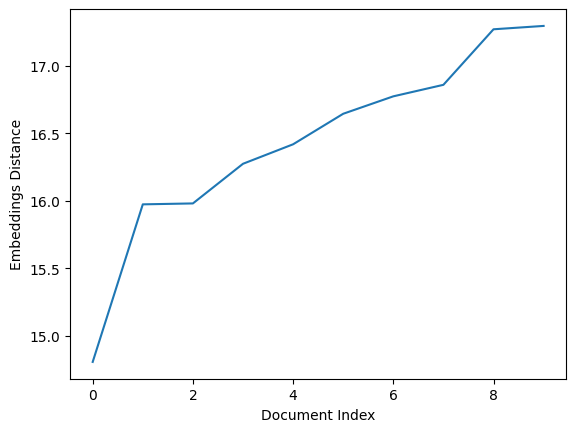

In [25]:
# Graph the embeddings distances, label both axes
import matplotlib.pyplot as plt

plt.plot(results.distance)
plt.xlabel('Document Index')
plt.ylabel('Embeddings Distance')
plt.show()


## Extra credit, rerankers

We can use rerankers to improve the sorting of the search results. Further reading:

- Answer.AI's [rerankers, why and how](https://www.answer.ai/posts/2024-09-16-rerankers.html#introducing-rerankers-why-and-how)
- Sentence Transformers [reranking documentation](https://sbert.net/examples/applications/retrieve_rerank/README.html)

In [16]:
from sentence_transformers import CrossEncoder
reranking_model = CrossEncoder("cross-encoder/ms-marco-MiniLM-L-6-v2")

/Users/jackbravo/Documents/bixal/esc-ai-chat/byaldi-colpali-pdf/.venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [17]:
texts = results.text.tolist()
ranks = reranking_model.rank(text_query, texts)
ranks

[{'corpus_id': 0, 'score': 3.8207016},
 {'corpus_id': 6, 'score': 1.5085411},
 {'corpus_id': 1, 'score': 1.2419469},
 {'corpus_id': 3, 'score': 1.1873164},
 {'corpus_id': 4, 'score': 0.24511442},
 {'corpus_id': 2, 'score': -0.967309},
 {'corpus_id': 5, 'score': -2.422687},
 {'corpus_id': 7, 'score': -4.343476},
 {'corpus_id': 8, 'score': -4.657504},
 {'corpus_id': 9, 'score': -5.7956524}]

In [18]:
# Create a dictionary mapping corpus_id to score
score_dict = {item['corpus_id']: item['score'] for item in ranks}

# Add the new scores to the dataframe
results['rerank_score'] = results.index.map(score_dict)

# Sort the dataframe by the new scores in descending order
rag_results_reranked = results.sort_values('rerank_score', ascending=False)
rag_results_reranked

,idx,distance,text,rerank_score
0,25,13.010966,**Crime Prevention and Justice Reform. Crime p...,3.820702
6,24,15.367569,"**Youth Participation, Empowerment, and Develo...",1.508541
1,11,13.462914,The CARICOM Secretariat Strategic Plan 2022-20...,1.241947
3,12,14.674122,### CARICOM SECRETARIAT STRATEGIC\n FRAMEWORK ...,1.187316
4,0,15.032048,###### CARICOM SECRETARIAT\n STRATEGIC PLAN,0.245114
2,6,14.636911,## FOREWORD\n\nThe Secretariat’s strategy to a...,-0.967309
5,19,15.320809,"In addition to these measures, the CSMT’s stra...",-2.422687
7,22,15.581043,Strategies and priority actions will focus on ...,-4.343476
8,14,15.760194,The Secretariat will work closely with Member ...,-4.657504
9,1,15.956948,"# 2022-2030\n\nCARICOM Secretariat, Turkeyen, ...",-5.795652
